In [227]:
import numpy as np
from pandas import read_csv
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
import pandas as pd

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


class PreProcessing:

    @staticmethod
    def data_description(data):
        print('Data Shape:', data.shape)
        print('Data Info:', data.info())
        print('Data Description:', data.describe())
        print('Data Head:', data.head())
        print('Data Tail:', data.tail())
        print('Data Columns:', data.columns)
        print('Data Null Values:', data.isnull().sum())
        plt.show()
        sns.pairplot(data)
        plt.show()
        return None

    @staticmethod
    def drop_na_columns(data):
        return data.dropna(axis=1, how='all')  

    @staticmethod
    def impute_missing_values(data):
        imputer = SimpleImputer(strategy='mean')
        imputer.fit(data)
        return imputer.transform(data)

    @staticmethod
    def encode_categorical_x(x):
        te = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
        return te.fit_transform(x)
    
    @staticmethod
    def encode_categorical_y(y):
        le = LabelEncoder()
        return le.fit_transform(y)

    @staticmethod
    def normalize(x):
        scaler = StandardScaler()
        return scaler.fit_transform(x)
    
    @staticmethod
    def apply_pca(x, n_components=None):
        pca = PCA(n_components=n_components)
        x_pca = pca.fit_transform(x)
        explained_variance = pca.explained_variance_ratio_
        print(f"Explained variance by each component: {explained_variance}")
        print(f"Total explained variance: {sum(explained_variance)}")
        return x_pca, pca

    @staticmethod
    def plot_pca(x, y, title):
        plt.figure(figsize=(8, 6))
        plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        plt.title(f'PCA Plot - {title}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Label')
        plt.show()
        return None
    
    @staticmethod
    def apply_lda(x, y, n_components=None):
        lda = LinearDiscriminantAnalysis(n_components=n_components)
        return lda.fit_transform(x, y), lda

    @staticmethod
    def plot_lda(x, y, title):
        plt.figure(figsize=(8, 6))
        plt.scatter(x[:, 0], x[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
        plt.title(f'LDA Plot - {title}')
        plt.xlabel('Component 1')
        plt.ylabel('Component 2')
        plt.colorbar(label='Cluster Label')
        plt.show()
        return None

In [229]:
class EvaluationMetrics:

    @staticmethod
    def plot_clusters(x, labels, title):
        plt.figure(figsize=(8, 6))
        plt.scatter(x[:, 0], x[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
        plt.title(f'Cluster Plot - {title}')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.colorbar(label='Cluster Label')
        plt.show()

    @staticmethod
    def silhouette_score(x, labels):
        if len(set(labels)) > 1:
            score = silhouette_score(x, labels)
        else:
            score = -1
        return score

    @staticmethod
    def calinski_harabasz_score(x, labels):
        if len(set(labels)) > 1:
            score = calinski_harabasz_score(x, labels)
        else:
            score = -1
        return score

    @staticmethod
    def davies_bouldin_score(x, labels):
        if len(set(labels)) > 1:
            score = davies_bouldin_score(x, labels)
        else:
            score = -1
        return score
    
    @staticmethod
    def elbow_method(x, max_clusters=10):
        distortions = []
        for i in range(1, max_clusters + 1):
            kmeans = KMeans(n_clusters=i)
            kmeans.fit(x)
            distortions.append(kmeans.inertia_)
        plt.figure(figsize=(8, 6))
        plt.plot(range(1, max_clusters + 1), distortions, marker='o')
        plt.title('Elbow Method')
        plt.xlabel('Number of clusters')
        plt.ylabel('Distortion')
        plt.grid()
        plt.show()
        return distortions

In [230]:
class Clustering:

    @staticmethod
    def kMeans(x):
        kmeans = KMeans(n_clusters=2)
        kmeans.fit(x)
        cluster_labels_kmeans = kmeans.labels_
        print(f"Number of clusters formed: {len(np.unique(cluster_labels_kmeans))}")
        print(f"The labels assigned by KMeans are: {cluster_labels_kmeans}")
        EvaluationMetrics.plot_clusters(x, cluster_labels_kmeans, 'KMeans')
        return cluster_labels_kmeans

    @staticmethod
    def agglomerative_clustering(x):
        agg = AgglomerativeClustering(n_clusters=2)
        cluster_labels_agg = agg.fit_predict(x)
        print(f"Number of clusters formed: {len(np.unique(cluster_labels_agg))}")
        print(f"The labels assigned by Agglomerative Clustering are: {cluster_labels_agg}")
        EvaluationMetrics.plot_clusters(x, cluster_labels_agg, 'Agglomerative Clustering')
        return cluster_labels_agg

    @staticmethod
    def spectral_clustering(x):
        spectral = SpectralClustering(n_clusters=2)
        cluster_labels_spectral = spectral.fit_predict(x)
        print(f"Number of clusters formed: {len(np.unique(cluster_labels_spectral))}")
        print(f"The labels assigned by Spectral Clustering are: {cluster_labels_spectral}")
        EvaluationMetrics.plot_clusters(x, cluster_labels_spectral, 'Spectral Clustering')
        return cluster_labels_spectral

    @staticmethod
    def dbScan(x):
        dbscan = DBSCAN(eps=0.5, min_samples=5)
        cluster_labels_dbscan = dbscan.fit_predict(x)
        print(f"Number of clusters formed: {len(np.unique(cluster_labels_dbscan))}")
        print(f"The labels assigned by DBSCAN are: {cluster_labels_dbscan}")
        EvaluationMetrics.plot_clusters(x, cluster_labels_dbscan, 'DBSCAN')
        return cluster_labels_dbscan

    @staticmethod
    def clustering_report(x):
        kmeans_labels = Clustering.kMeans(x)
        agg_labels = Clustering.agglomerative_clustering(x)
        spectral_labels = Clustering.spectral_clustering(x)
        dbscan_labels = Clustering.dbScan(x)
        return kmeans_labels, agg_labels, spectral_labels, dbscan_labels

In [231]:
data = read_csv("./dataset/credit_card.csv")
data.drop('CUST_ID', axis=1, inplace=True)

Data Shape: (8950, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-nul

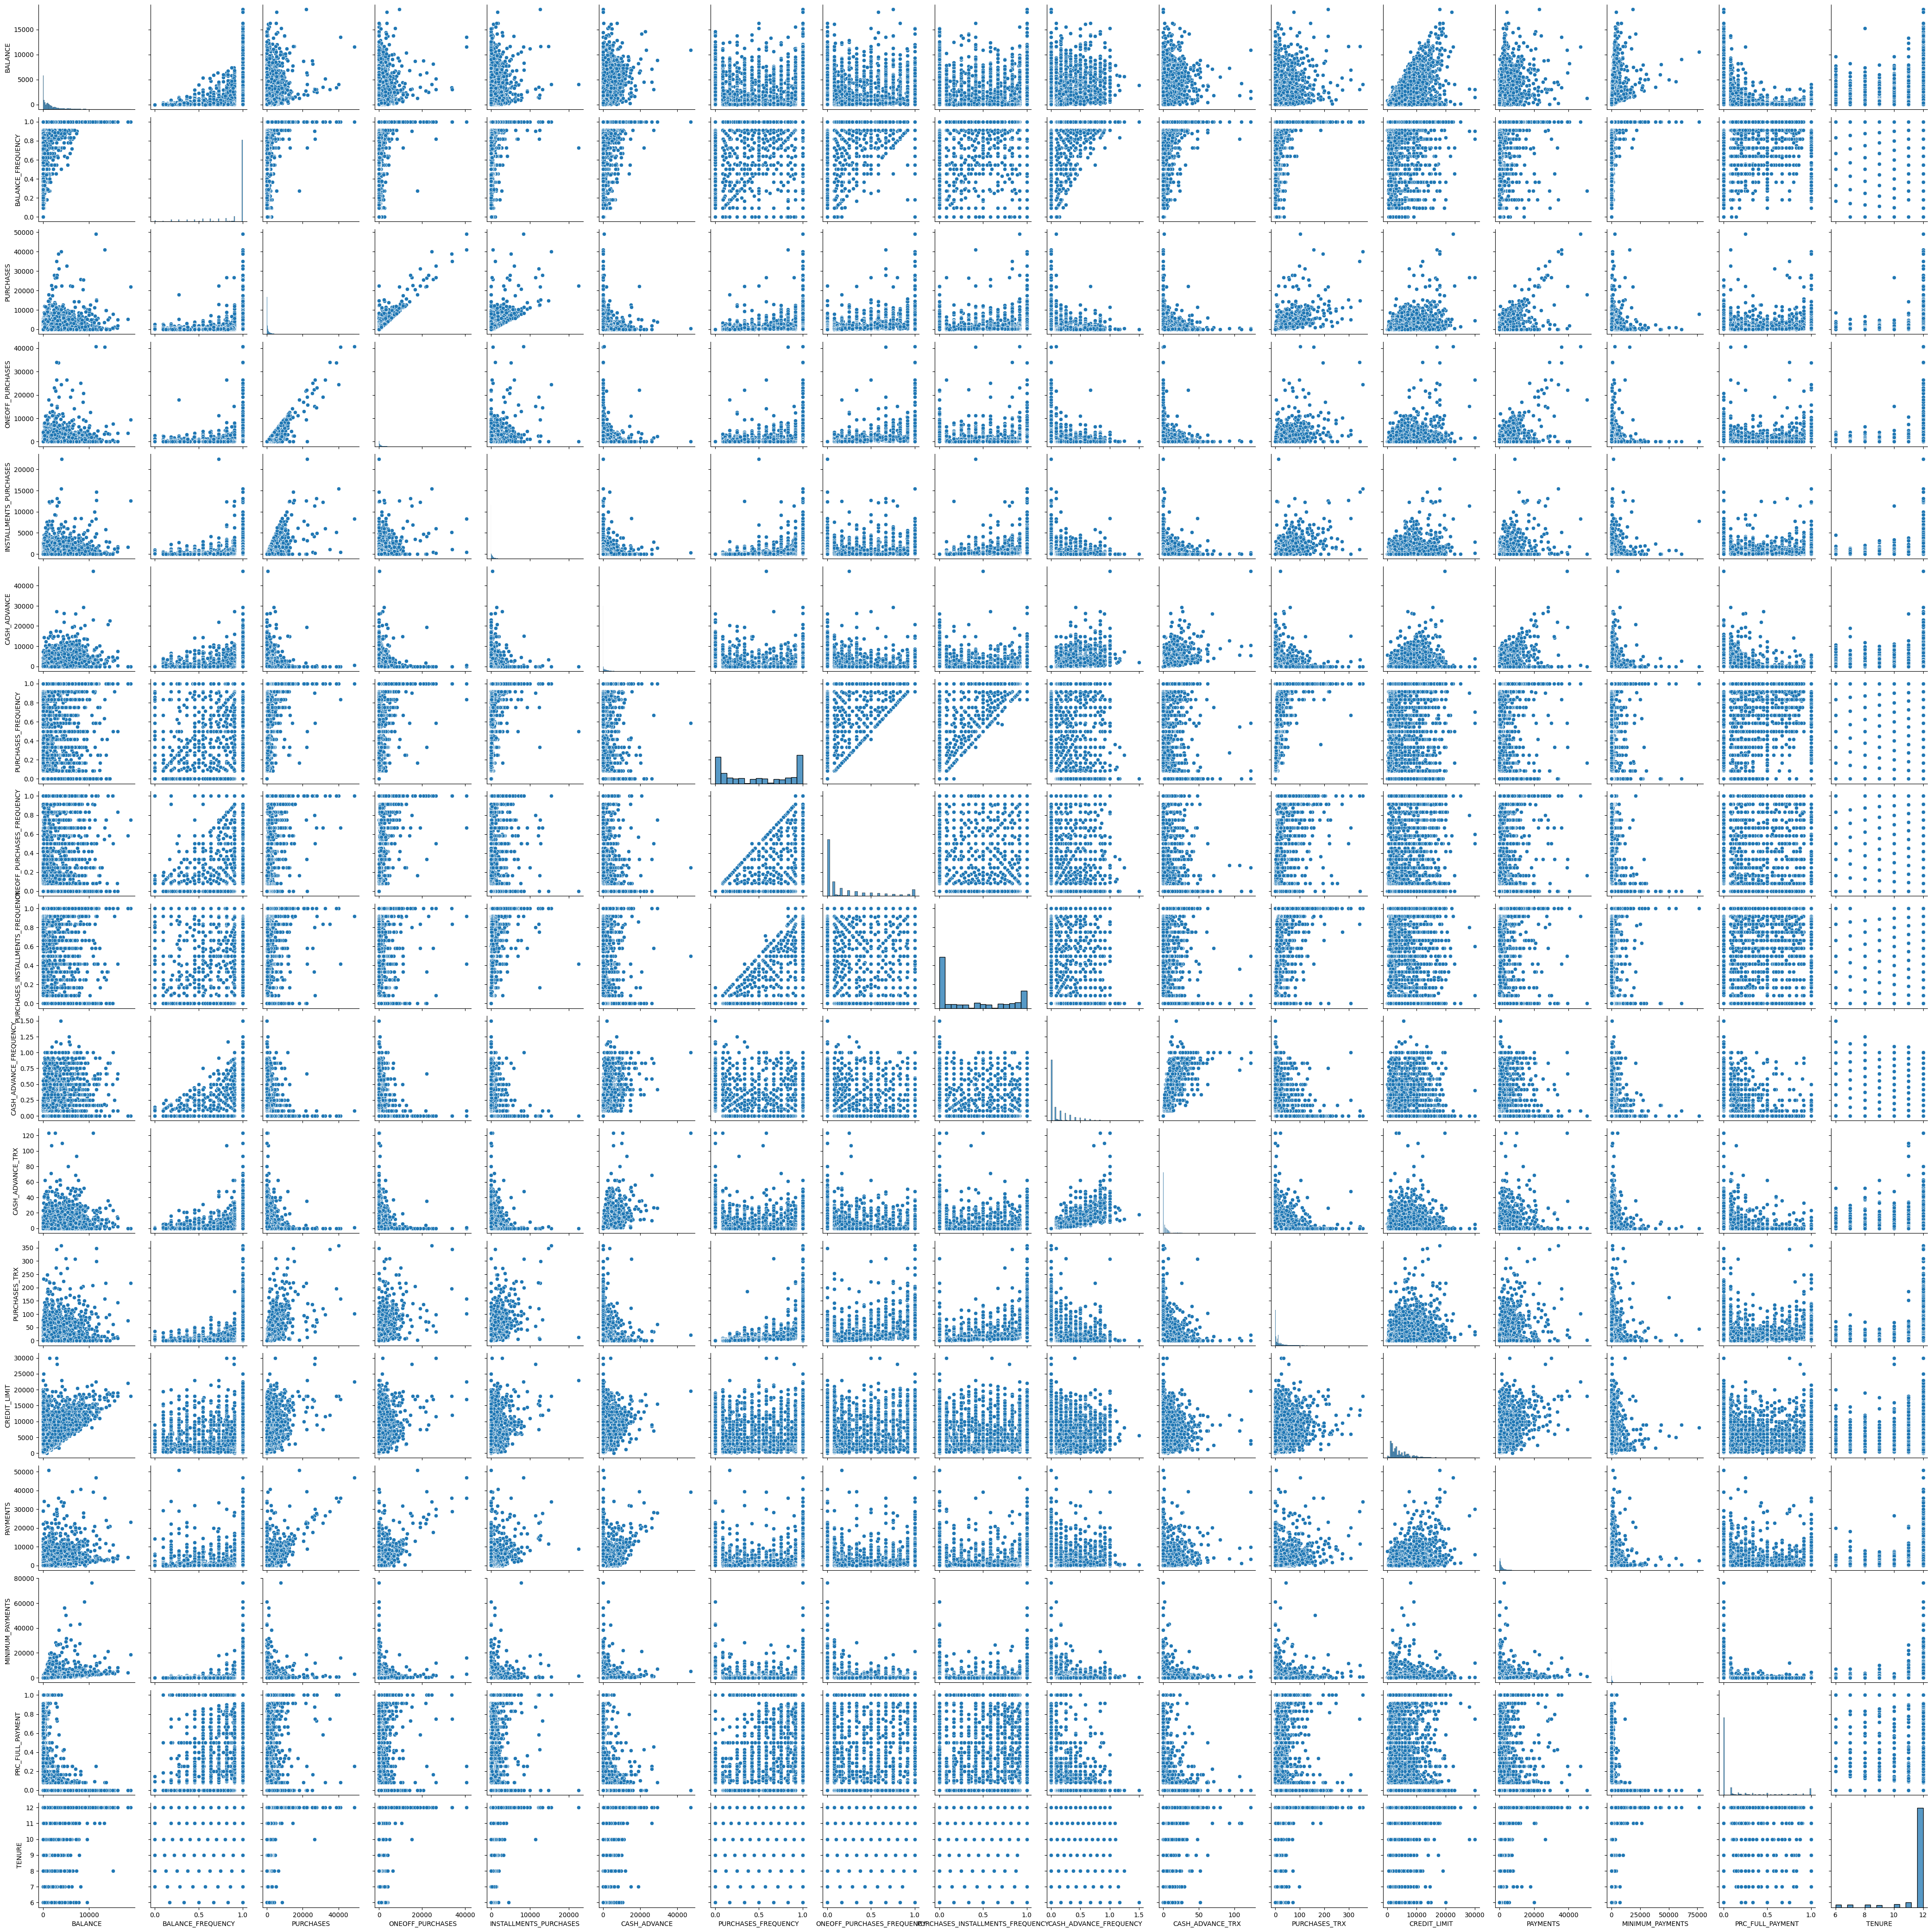

In [232]:
PreProcessing.data_description(data)

In [233]:
data = PreProcessing.drop_na_columns(data)

In [234]:
x = data

In [235]:
# x = PreProcessing.encode_categorical_x(x)
x = pd.get_dummies(x)
x = PreProcessing.impute_missing_values(x)
# x = x.ffill(inplace=True)
x = PreProcessing.normalize(x)

x = pd.DataFrame(x)
print(x.head())

         0         1         2         3         4         5         6   \
0 -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1  0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2  0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3  0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4 -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   

         7         8         9         10        11        12        13  \
0 -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1 -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2  2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3 -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4 -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   

             14        15       16  
0 -3.109675e-01 -0.525551  0.36068  
1  8.931021e-02  0.23422

In [236]:
x_pca, pca = PreProcessing.apply_pca(x, n_components=3)

Explained variance by each component: [0.27290037 0.20301991 0.08791979]
Total explained variance: 0.5638400799783172


Number of clusters formed: 2
The labels assigned by KMeans are: [0 0 1 ... 0 0 0]


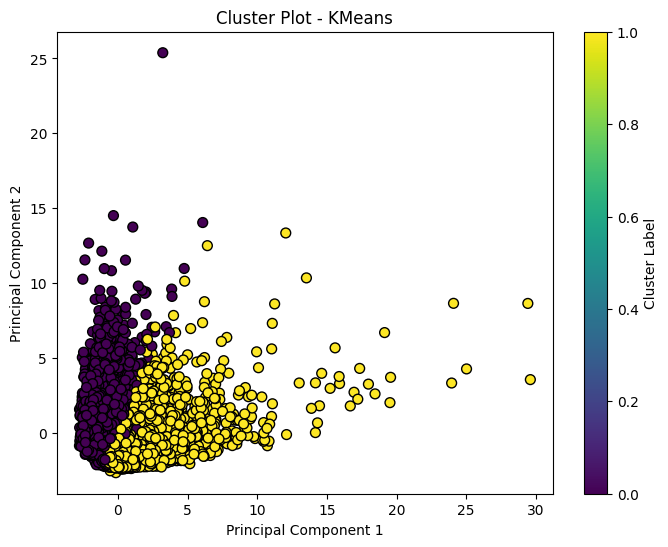

Number of clusters formed: 2
The labels assigned by Agglomerative Clustering are: [0 0 0 ... 0 0 0]


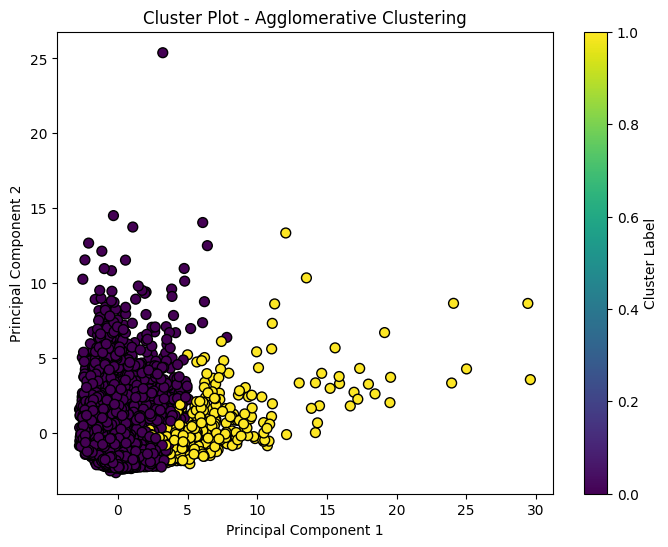

In [ ]:
kmeans_labels, agg_labels, spectral_labels, dbscan_labels = Clustering.clustering_report(x_pca)

In [ ]:
pca_scores = {}

pca_scores['KMeans'] = EvaluationMetrics.silhouette_score(x_pca, kmeans_labels)
pca_scores['Agglomerative'] = EvaluationMetrics.silhouette_score(x_pca, agg_labels)
pca_scores['Spectral'] = EvaluationMetrics.silhouette_score(x_pca, spectral_labels)
pca_scores['DBSCAN'] = EvaluationMetrics.silhouette_score(x_pca, dbscan_labels)

for model, score in pca_scores.items():
    print(f"{model}: {score}")

best_model = max(pca_scores, key=lambda x: pca_scores[x])
print(f"Best Model: {best_model}")

In [ ]:
import matplotlib.pyplot as plt

lda_scores = {}

models_labels = {
    "KMeans": kmeans_labels,
    "Agglomerative": agg_labels,
    "Spectral": spectral_labels,
    "DBSCAN": dbscan_labels
}

plt.figure(figsize=(12, 8))

for model_name, label in models_labels.items():
    x_lda = LinearDiscriminantAnalysis(n_components=3).fit_transform(x, label)

    if model_name == "KMeans":
        kmeans = KMeans(n_clusters=2, random_state=42).fit(x_lda)
        kmeans_labels = kmeans.labels_
        lda_score = silhouette_score(x_lda, kmeans_labels)

    elif model_name == "Agglomerative":
        agg = AgglomerativeClustering(n_clusters=2).fit(x_lda)
        agg_labels = agg.labels_
        lda_score = silhouette_score(x_lda, agg_labels)

    elif model_name == "Spectral":
        spectral = SpectralClustering(n_clusters=2).fit(x_lda)
        spectral_labels = spectral.labels_
        lda_score = silhouette_score(x_lda, spectral_labels)

    elif model_name == "DBSCAN":
        dbscan = DBSCAN(eps=0.5, min_samples=5).fit(x_lda)
        dbscan_labels = dbscan.labels_
        lda_score = silhouette_score(x_lda, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1

    lda_scores[model_name] = lda_score

    plt.subplot(2, 2, list(models_labels.keys()).index(model_name) + 1)
    plt.scatter(x_lda, [0] * len(x_lda), c=label, cmap='viridis', label=model_name, alpha=0.5)
    plt.title(f'{model_name} Clusters')
    plt.xlabel('LDA Component')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

for model_name, score in lda_scores.items():
    print(f"LDA Score for {model_name}: {score}")
